# Web Scraping with requests and Beautiful Soup

## Jayden Mathew
## 4/18/2024

### Questions: 
#### 1. Who is the best goalkeeper (in terms of saves) on the Real Madrid team in the 2023-2024 season?
#### 2. Who are the best support players (passers) on the team? (successfully completed to attempted pass ratio)
#### 3. Which players hold the ball the longest before passing or shooting (recieves vs. touches ratio)
#### 4. How diverse is the Real Madrid team? (Count of countries)
#### 5. Who is the best challenger on the defensive side of the team (ratio of successfull/unsuccessful challenges)?

#### The following two cells gather the import statements for the web scraping part of the project and scrape the given url. 
#### The url for this project leads to the stats page for the current Real Madrid soccer team, which has multiple different tables and datasets to be scraped. 

In [2]:
# Import statements to scrape webpage and save into manipulatable pandas dataframes
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd

In [3]:
# URL of the website to be scraped
url = 'https://fbref.com/en/squads/53a2f082/2023-2024/all_comps/Real-Madrid-Stats-All-Competitions'

# Method to scrape webpage, which is then saved to the variable 'soup'. 
def scrape_webpage(url):
    response = requests.get(url)
    status = response.status_code
    if status == 200:
        page = response.text
        soup = bs(page, "html.parser")
        return soup
    else:
        print(f"Received status code {status}") # Fail safe in case the website cannot be scraped

soup = scrape_webpage(url)

#### The following cell is used to scrape the table that helps answer Question 1

In [4]:
# Find and store data from the stats_keeper_combined table to stats_table
stats_table = soup.find(id='stats_keeper_combined').tbody

# List to store goalkeeper stats
goal_keeper_stats = []

# Extract data from each row in the table
for row in stats_table.find_all('tr'):
    player = row.find(attrs={'data-stat':'player','scope':'row'}).text.strip()
    mp = int(row.find(attrs={'data-stat':'gk_games'}).text.strip())
    saves = int(row.find(attrs={'data-stat':'gk_saves'}).text.strip())
    save_pct = row.find(attrs={'data-stat':'gk_save_pct'}).text.strip()
    
    # Calculate ratio of matches played to saves
    mp_to_saves_ratio = round(mp / saves, 2) if saves != 0 else 0
    
    # Append data to the list
    goal_keeper_stats.append({
        'Player': player,
        'MP': mp,
        'Saves': saves,
        'Save%': save_pct,
        'MP_to_Saves_Ratio': mp_to_saves_ratio  # Adding the ratio to the dictionary
    })

# Create a DataFrame from the list
goal_keeper_df = pd.DataFrame(goal_keeper_stats)

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Display the DataFrame
print(goal_keeper_df)

              Player  MP  Saves Save%  MP_to_Saves_Ratio
0       Andriy Lunin  27     81  79.0               0.33
1  Kepa Arrizabalaga  18     41  70.7               0.44


#### The following cell is used to scrape the table that helps answer Question 2

In [5]:
# Find and store data from the stats_passing_combined table to passing_table
passing_table = soup.find(id='stats_passing_combined').tbody

# List to store passing stats
passing_stats = []

# Extract data from each row in the table
for row in passing_table.find_all('tr'):
    player = row.find(attrs={'data-stat': 'player'}).text
    completed = row.find(attrs={'data-stat': 'passes_completed'}).text
    attempted = row.find(attrs={'data-stat': 'passes'}).text
    
    # Append data to the list
    passing_stats.append({
        'Player': player,
        'Completed': completed,
        'Attempted': attempted
    })

# Create a DataFrame from the list
passing_df = pd.DataFrame(passing_stats)

# Convert 'Completed' and 'Attempted' columns to numeric forms
passing_df['Completed'] = pd.to_numeric(passing_df['Completed'])
passing_df['Attempted'] = pd.to_numeric(passing_df['Attempted'])

# Calculate successful completion ratio
passing_df['Completion_Ratio'] = passing_df['Completed'] / passing_df['Attempted']

# Sort DataFrame by completion ratio in descending order
passing_df_sorted = passing_df.sort_values(by='Completion_Ratio', ascending=False)

# Display the DataFrame
print(passing_df_sorted)

                 Player  Completed  Attempted  Completion_Ratio
10        Ferland Mendy     1368.0     1469.0          0.931246
24         Éder Militão       38.0       41.0          0.926829
6                 Nacho     1366.0     1474.0          0.926730
5            Toni Kroos     2588.0     2833.0          0.913519
9   Aurélien Tchouaméni     1576.0     1737.0          0.907311
21           Arda Güler       28.0       31.0          0.903226
11    Eduardo Camavinga     1272.0     1409.0          0.902768
17          David Alaba     1000.0     1116.0          0.896057
1       Antonio Rüdiger     1842.0     2058.0          0.895044
0     Federico Valverde     2089.0     2342.0          0.891973
2               Rodrygo     1039.0     1171.0          0.887276
3       Jude Bellingham     1520.0     1737.0          0.875072
19        Dani Ceballos      303.0      347.0          0.873199
15    Kepa Arrizabalaga      471.0      543.0          0.867403
12          Luka Modrić     1389.0     1

#### The following cell is used to scrape the table that helps answer Question 3

In [6]:
# Find and store data from the stats__possesion_combined table to possesion_table
possession_table = soup.find(id='stats_possession_combined').tbody

# List to store possession stats
possession_stats = []

# Extract data from each row in the table
for row in possession_table.find_all('tr'):
    player = row.find(attrs={'data-stat': 'player'}).text
    touches = row.find(attrs={'data-stat': 'touches'}).text
    receives = row.find(attrs={'data-stat': 'passes_received'}).text
    
    # Append data to the list
    possession_stats.append({
        'Player': player,
        'Touches': touches,
        'Receives': receives
    })

# Create a DataFrame from the list
possession_df = pd.DataFrame(possession_stats)

# Convert numeric columns to numeric data types
numeric_cols = ['Touches', 'Receives']
possession_df[numeric_cols] = possession_df[numeric_cols].apply(pd.to_numeric)

# Calculate the ratio of receives to touches
possession_df['Receives_to_Touches_Ratio'] = possession_df['Receives'] / possession_df['Touches']

# Sort DataFrame by the ratio in descending order
sorted_df = possession_df.sort_values(by='Receives_to_Touches_Ratio', ascending=False)

# Display the DataFrame
print(sorted_df)

                 Player  Touches  Receives  Receives_to_Touches_Ratio
2               Rodrygo   1588.0    1312.0                   0.826196
7       Vinicius Júnior   1180.0     973.0                   0.824576
3       Jude Bellingham   2145.0    1760.0                   0.820513
19        Dani Ceballos    399.0     326.0                   0.817043
14          Brahim Díaz    971.0     785.0                   0.808445
5            Toni Kroos   3007.0    2358.0                   0.784170
12          Luka Modrić   1753.0    1373.0                   0.783229
21           Arda Güler     41.0      32.0                   0.780488
0     Federico Valverde   2728.0    2109.0                   0.773094
9   Aurélien Tchouaméni   1965.0    1503.0                   0.764885
13               Joselu    542.0     411.0                   0.758303
1       Antonio Rüdiger   2309.0    1729.0                   0.748809
17          David Alaba   1242.0     922.0                   0.742351
11    Eduardo Camavi

#### The following cell is used to scrape the table that helps answer Question 4

In [7]:
# Find and store data from the stats_playing_time_combined table to playing_time_table
playing_time_table = soup.find(id='stats_playing_time_combined')

# Check if the table is found
if playing_time_table:
    # List to store player nationalities
    player_nationalities = []

    # Extract data from each row in the table
    for row in playing_time_table.find_all('tr'):
        nationality = row.find(attrs={'data-stat': 'nationality'})
        if nationality:
            # Strip any country abbreviations like 'fr', 'ua', 'eng', etc.
            nationality_text = nationality.text.strip()
            nationality_text = nationality_text.split()[-1]  # Get the last word assuming it's the abbreviation
            # Check if the nationality is a valid country abbreviation
            if len(nationality_text) == 3 and nationality_text.isalpha():
                player_nationalities.append(nationality_text)

    # Create a set of unique nationalities
    unique_nationalities = set(player_nationalities)

    # Count the occurrences of each nationality
    nationality_counts = {nationality: player_nationalities.count(nationality) for nationality in unique_nationalities}

    # Convert the dictionary to a DataFrame
    nationality_df = pd.DataFrame(nationality_counts.items(), columns=['Nationality', 'Count'])

    # Print the table without index
    print("Unique Nationalities in the Real Madrid team:")
    print(nationality_df.to_string(index=False))
else:
    print("Playing time table not found.")

Unique Nationalities in the Real Madrid team:
Nationality  Count
        UKR      1
        MAR      1
        ARG      1
        ESP     18
        GER      2
        ENG      1
        CRO      1
        BRA      4
        URU      2
        AUT      1
        FRA      4
        TUR      1


#### The following cell is used to scrape the table that helps answer Question 5

In [21]:
# Find and store data from the stats_defense_combined table to defense_table
defense_table = soup.find(id='stats_defense_combined').tbody

# List to store player names, tackles won, and challenges lost
player_stats = []

# Extract data from each row in the table
for row in defense_table.find_all('tr'):
    player = row.find(attrs={'data-stat': 'player'}).text
    tackles_won = int(row.find(attrs={'data-stat': 'tackles_won'}).text)
    challenges_lost_elem = row.find(attrs={'data-stat': 'challenges_lost'})
    
    # Check if challenges_lost element exists and is not empty
    if challenges_lost_elem and challenges_lost_elem.text.strip():
        challenges_lost = int(challenges_lost_elem.text)
    else:
        # If challenges_lost is empty or not valid, set it to 0
        challenges_lost = 0
    
    # Avoid division by zero by checking if challenges_lost is not zero
    if challenges_lost != 0:
        ratio = tackles_won / challenges_lost
    else:
        ratio = 0
    
    # Append data to the list
    player_stats.append({
        'Player': player,
        'Ratio': ratio
    })

# Create a DataFrame from the list
player_stats_df = pd.DataFrame(player_stats)

# Find the player with the highest ratio
best_challenger = player_stats_df.loc[player_stats_df['Ratio'].idxmax()]

# Print the result
print(player_stats_df)
print(" ")
print("The best challenger on the defensive side of the team is:", best_challenger['Player'])
print("With a ratio of successful to unsuccessful challenges of:", best_challenger['Ratio'])

                 Player     Ratio
0     Federico Valverde  2.045455
1       Antonio Rüdiger  3.000000
2               Rodrygo  0.941176
3       Jude Bellingham  1.695652
4         Dani Carvajal  2.086957
5            Toni Kroos  1.075000
6                 Nacho  1.400000
7       Vinicius Júnior  1.800000
8          Andriy Lunin  0.000000
9   Aurélien Tchouaméni  2.083333
10        Ferland Mendy  2.833333
11    Eduardo Camavinga  2.450000
12          Luka Modrić  1.700000
13               Joselu  0.600000
14          Brahim Díaz  3.142857
15    Kepa Arrizabalaga  1.000000
16        Lucas Vázquez  3.428571
17          David Alaba  2.500000
18          Fran Garcia  0.866667
19        Dani Ceballos  0.833333
20          Nicolás Paz  2.000000
21           Arda Güler  0.000000
22     Álvaro Carrillo  0.000000
23      Vinicius Tobias  0.000000
24         Éder Militão  0.000000
25         Mario Martín  0.000000
26       Gonzalo García  0.000000
27         Álvaro Muñoz  0.000000
 
The best cha

#### The next part of this project consisted of using the scraped pages to visualize the data so that it can be analyzed and understood. 

#### The following cell shows all import statements needed for to visualize the data pictorically. 

In [9]:
# Import statements to plot/graph the data above
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

### The following three cells are all used to graph Question 1. This is because the answer for this question could not be determined by comparing generalized information between goalkeepers and needed precise comparisons. Although this could have been done in one singular cell through the use of seaborn, I believe the three separate graphs help detail the minor differences that help accurately answer the question. 

#### The following cell graphs the data scraped in regards to Question 1 part A ( total saves)

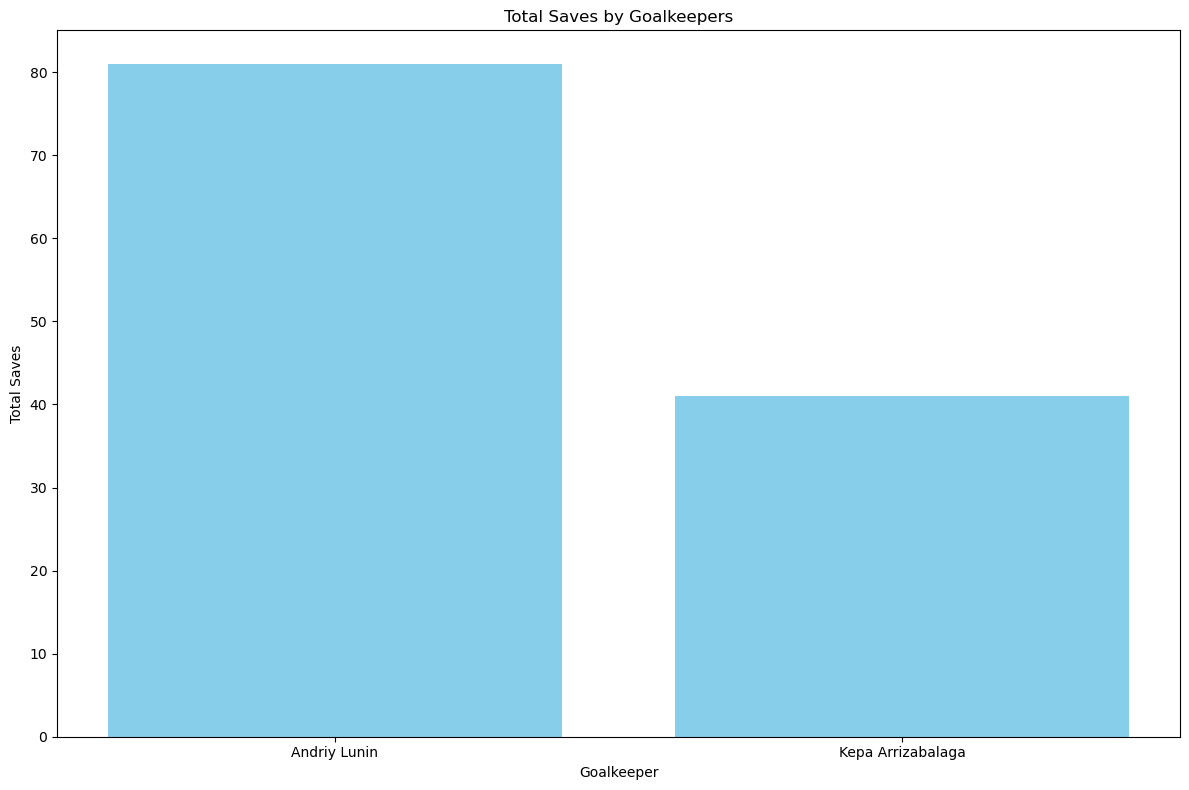

In [10]:
# Sorting the DataFrame by saves in descending order for better visualization
goal_keeper_df_sorted = goal_keeper_df.sort_values(by='Saves', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart (specify dataset and color for graph)
plt.bar(goal_keeper_df_sorted['Player'], goal_keeper_df_sorted['Saves'], color='skyblue')

# Add labels and title
plt.title('Total Saves by Goalkeepers')
plt.xlabel('Goalkeeper')
plt.ylabel('Total Saves')

# Show the plot
plt.tight_layout()
plt.show()

### As shown by the above graph, in the previous season, Andriy Lunin had almost double the amount of saves as Kepa Arrizabalaga (around 80 goals in comparison to around 40). However, this cannot solely determine the better goalkeeper as there are several factors that may have boosted one goalkeepers totals compared to the other. These factors include: matches played, time played, injuries, types of goals, etc.

#### The following cell graphs the data scraped in regards to Question 1 part B (save percentages)

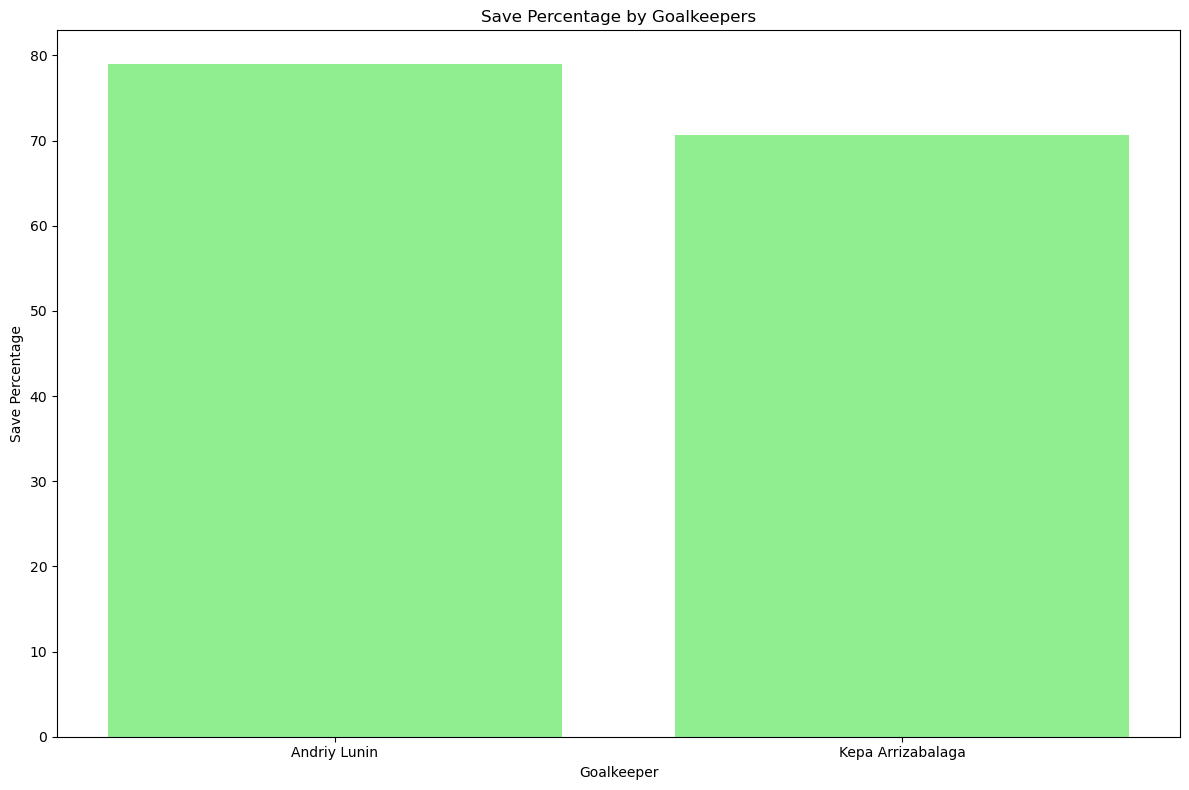

In [11]:
# Convert 'Save%' column to float
goal_keeper_df['Save%'] = goal_keeper_df['Save%'].astype(float)

# Sort the DataFrame by save percentage in descending order for better visualization
goal_keeper_df_sorted_save_pct = goal_keeper_df.sort_values(by='Save%', ascending=False)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart (specify dataset and color for graph)
plt.bar(goal_keeper_df_sorted_save_pct['Player'], goal_keeper_df_sorted_save_pct['Save%'], color='lightgreen')

# Add labels and title
plt.title('Save Percentage by Goalkeepers')
plt.xlabel('Goalkeeper')
plt.ylabel('Save Percentage')

# Show the plot
plt.tight_layout()
plt.show()

### The above graph compares the save percentages of both of the goalkeepers. This data shows that both are excellent goalkeepers boasting around a 70-80% save percentage. That being said, the chart clearly shows that Andriy Lunin does have a higher save percentage compared to Kepa Arrizabalaga. This makes the answer to Question 1 clearer as it compares the saves each of the players have compared to the total amount of shots against them. Therefore it is a fairer comparison than the previous graph. 

#### The following cell graphs the data scraped in regards to Question 1 part C (matches played : saves ratio)

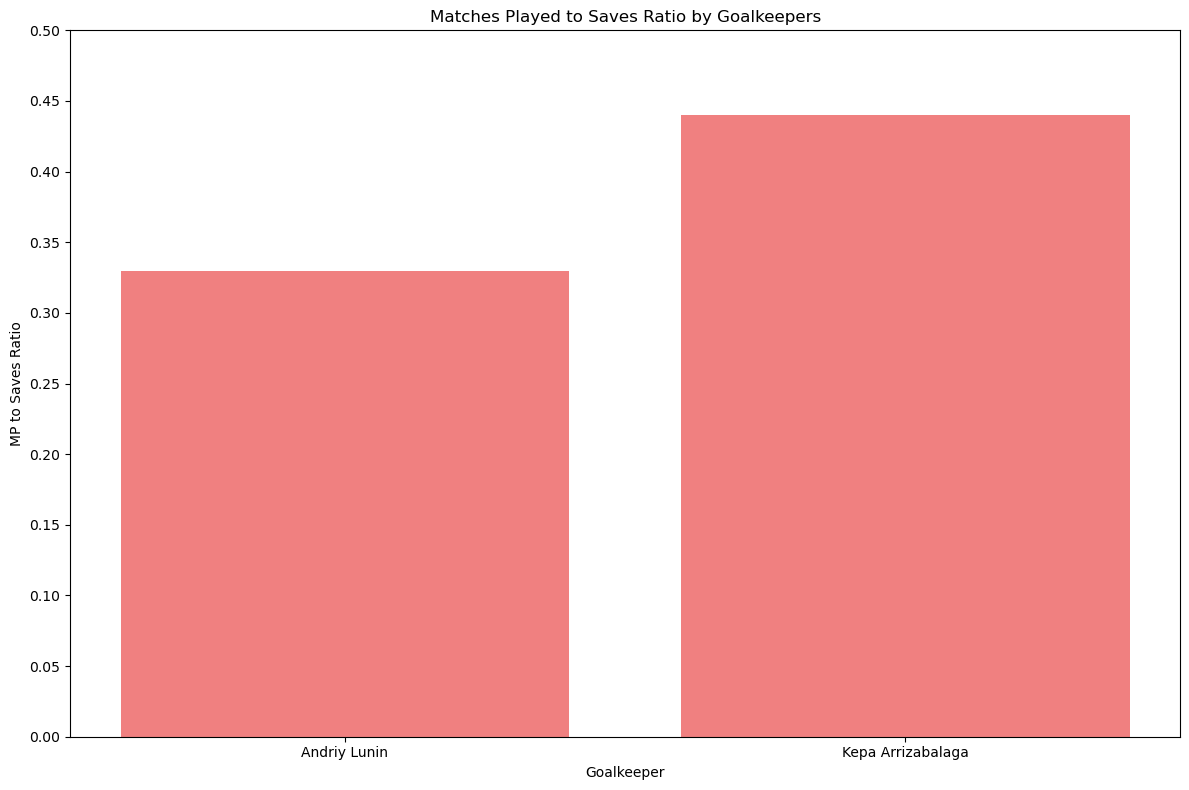

In [12]:
# Sort the DataFrame by ratio in ascending order for better visualization
goal_keeper_df_sorted_ratio = goal_keeper_df.sort_values(by='MP_to_Saves_Ratio')

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart (specify dataset and color for graph)
plt.bar(goal_keeper_df_sorted_ratio['Player'], goal_keeper_df_sorted_ratio['MP_to_Saves_Ratio'], color='lightcoral')

# Add labels and title
plt.title('Matches Played to Saves Ratio by Goalkeepers')
plt.xlabel('Goalkeeper')
plt.ylabel('MP to Saves Ratio')

# Set y-axis ticks at 0.05 intervals
plt.yticks(np.arange(0, 0.51, 0.05))

# Set maximum y-axis value to 0.5
plt.ylim(0, 0.5)

# Show the plot
plt.tight_layout()
plt.show()

### The above graph compares the matches played to total saves for both of the goalkeepers. The chart shows that Kepa has about a .10 higher ratio than Andriy which shows that in Kepa's matches he had more saves on average compared to Andriy. This also helps clear up the answer to Question 1 as this directly compares matches to saves whereas the previous graph compared save percentages which factor in shots attempts off target and more. 

### Overall it is hard to determine the better goalkeeper through this data as the different factors that play a role in goalkeeping are too immense to measure. In fact, through the data above it can be seen that both goalkeepers are elite level players that do well in their position. However, if an answer had to be given, it can be assumed that Andriy is the better goalkeeper due to his higher placement (in comparison to Kepa) in 2 of the 3 compared values. Furthermore, Andriy starts for the team more, thus increasing his matches played valued, which show how well valued he is on the Real Madrid team. 

#### The following cell graphs the data scraped in regards to Question 2

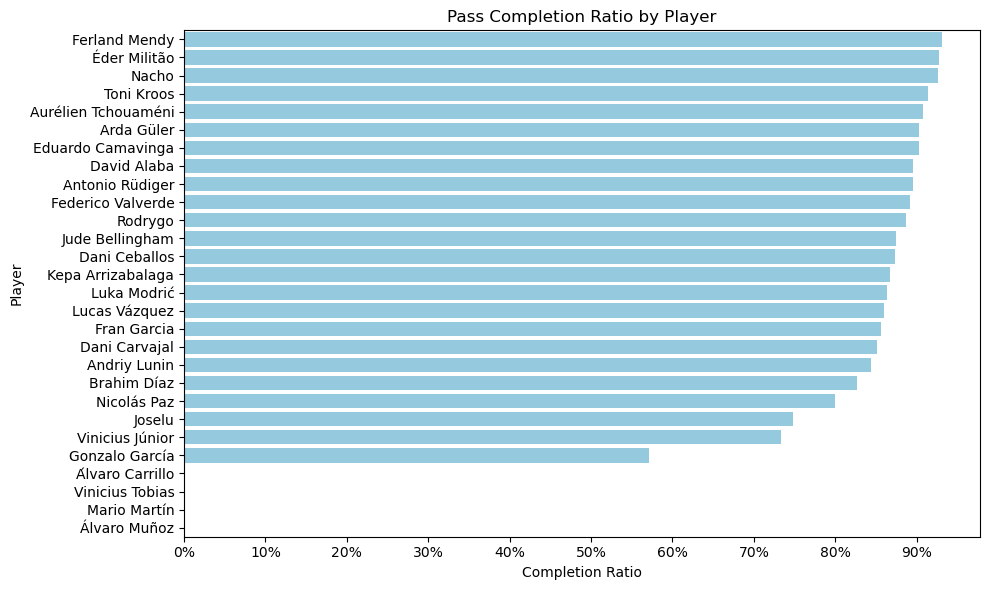

In [13]:
# Set the figure size
plt.figure(figsize=(10, 6)) 

# Create a bar plot (specify dataset and color for graph)
sns.barplot(x='Completion_Ratio', y='Player', data=passing_df_sorted, color='skyblue')

# Add labels and title
plt.title('Pass Completion Ratio by Player')
plt.xlabel('Completion Ratio')
plt.ylabel('Player')

# Adjust x-axis ticks
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))  # Convert to percentages

# Set x-axis intervals to every 10%
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(0.10))

# Show plot
plt.tight_layout()
plt.show()

### The graph above displays the players who have a better success rate in passing throughout the Real Madrid games. This was done by comparing their successful passes to their total passes, giving a completion ratio. From this data, we can see that Ferland Mendy is the best support (passing) player on the team, followed by Eder Militao, Nacho, and Toni Kroos. Furthermore, it can be seen that Gonzalo Garcia has the worst completion ratio on the team. The final four players had no data, most likely due to their position, physical conditions, and time on the field. 

#### The following cell graphs the data scraped in regards to Question 3

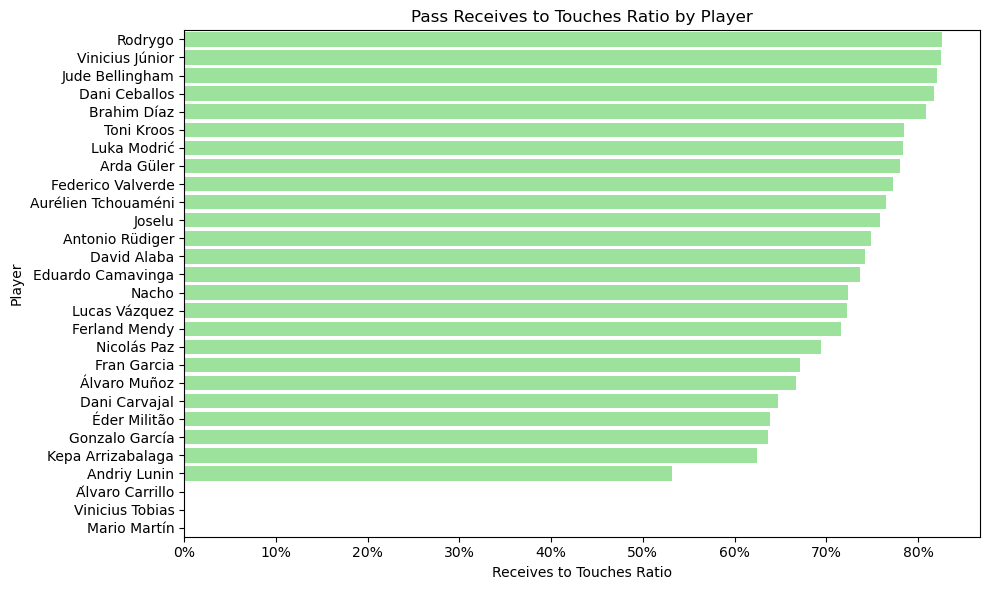

In [14]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot (specify dataset and color for graph)
sns.barplot(x='Receives_to_Touches_Ratio', y='Player', data=sorted_df, color='lightgreen')

# Add labels and title
plt.title('Pass Receives to Touches Ratio by Player')
plt.xlabel('Receives to Touches Ratio')
plt.ylabel('Player')

# Adjust x-axis ticks
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))  # Convert to percentages

# Set x-axis intervals to every 10%
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(0.1))

# Show plot
plt.tight_layout()
plt.show()

### The above graph compares the amount of times players received the ball from a pass and how many touches they made on the ball throughout their career. By comparing these values, the receives to touches ratio value was found and compared to see who held on to the ball the longest during their times in possession. From the data, it can be seen that Rodrygo had the highest ratio (about 80%) and was just above Vinicus Junior. Moreover, the player with the least amount of touches per receive was Andriy Lunin. It is important to note that both goalkeepers compared before are at the bottom of the list which attest to the accuracy of the list as goalkeepers keep the ball for very short period of times. The last three names of the table had no data to measure for the 2023 to 2024 season. 

#### The following cell graphs the data scraped in regards to Question 4

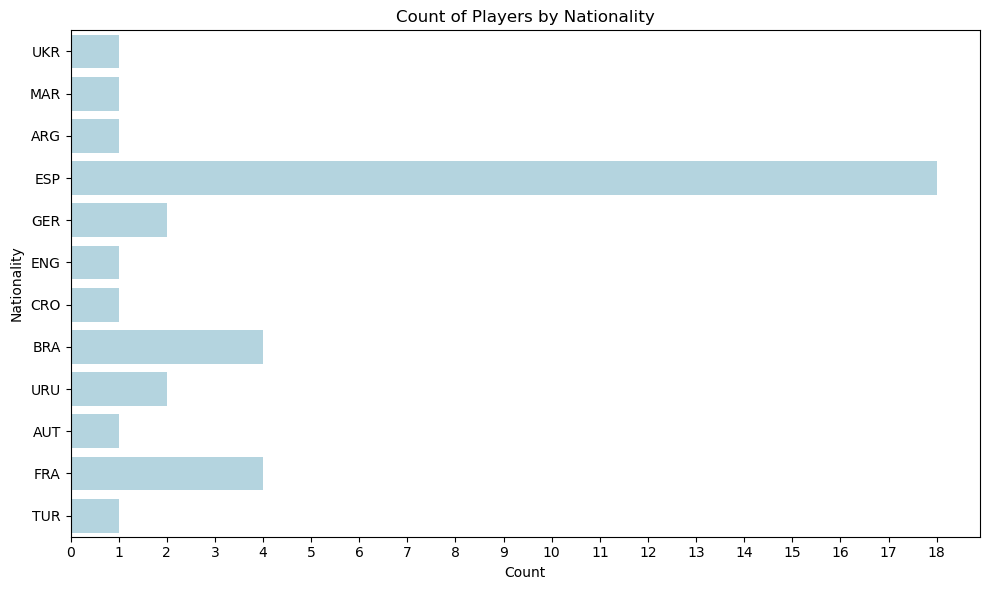

In [17]:
# Set the figure size
plt.figure(figsize=(10, 6))  

# Create the bar plot (specify dataset and color for graph)
sns.barplot(x='Count', y='Nationality', data=nationality_df, color='lightblue')

# Add labels and title
plt.title('Count of Players by Nationality')
plt.xlabel('Count')
plt.ylabel('Nationality')

# Set x-axis intervals to every 1
plt.gca().xaxis.set_major_locator(mtick.MultipleLocator(1))

# Show plot
plt.tight_layout()
plt.show()

### The above graph compares the nationalities of all the players to see how diverse the Real Madrid team is. According to the graph, the team consists of 12 different countries. The majority of players on the team come from Spain (Espana) and is followed by Brazil and France. Following these countries is Germany and Uruguay, which is then followed by the remainder of the countries who are all tied. This shows that the team is partially diverse as it is made up from many countries but consist mostly of Spain's players. 

#### The following cell graphs the data scraped in regards to Question 5

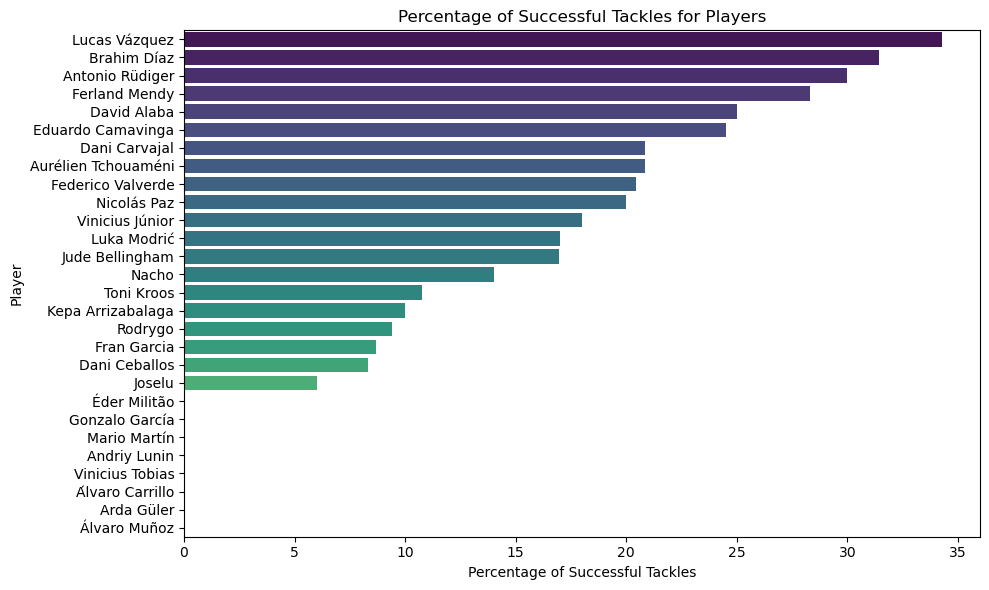

In [22]:
# Sort DataFrame in descending order based on ratio value
player_stats_df = player_stats_df.sort_values(by='Ratio', ascending=False)

# Convert ratio to percentage
player_stats_df['Ratio'] = player_stats_df['Ratio'] * 10

# Plot dataframe using seaborn
# Set figure size
plt.figure(figsize=(10, 6))

# Create the bar plot (specify dataset and color for graph)
sns.barplot(x='Ratio', y='Player', data=player_stats_df, palette='viridis')

# Adding labels and title
plt.xlabel('Percentage of Successful Tackles')
plt.ylabel('Player')
plt.title('Percentage of Successful Tackles for Players')

# Show plot
plt.tight_layout()
plt.show()

### The final graph depicts the percentage of successful tackles made by the players on the Real Madrid team this season. This percentage was created by taking the ratio of successful tackles to total tackles and converting that value into a percentage. According to the data, Lucas Vazquez is the most successful tackler on the team, while Joselu is the least successful tackler on the team. 

## This concludes the web scraping and analysis of the Real Madrid soccer team for the 2023-2024 season.